In [9]:
import pandas as pd
df=pd.read_csv('winequality-red.csv')

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
df.isnull().sum().sum()

0

In [12]:
x=df.iloc[:,:-1]
y=df.quality

In [13]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [14]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [15]:
# from sklearn import preprocessing
# import numpy as np

# x_array = np.array(y)

# y_ = preprocessing.normalize([x_array])
# print(y_)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20)

In [17]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [18]:
from sklearn.decomposition import PCA
pca=PCA()
X_train_ss_pca=pca.fit_transform(X_train_ss)
X_test_ss_pca=pca.transform(X_test_ss)

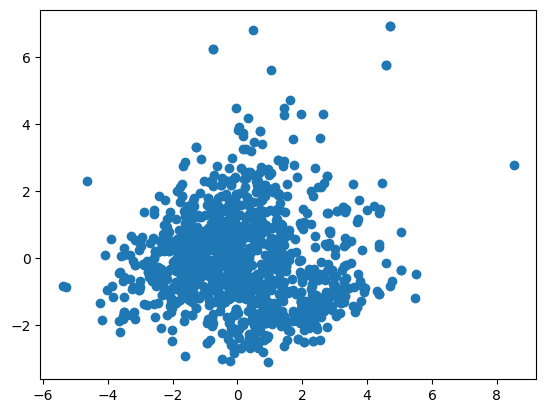

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X_train_ss_pca[:,0],X_train_ss_pca[:,1])

In [20]:
from sklearn.cluster import KMeans

In [21]:
wcss=[]
for i in range(1,11):
    p=KMeans(n_clusters=i,init='k-means++')
    y_pred=p.fit_predict(X_train_ss_pca)
    wcss.append(p.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [22]:
wcss

[14069.000000000007,
 11444.251624717113,
 10075.813752301618,
 9015.776067964543,
 8148.639897819859,
 7464.954384093068,
 6891.38297357268,
 6613.715574778627,
 6341.717573211808,
 6079.129216890963]

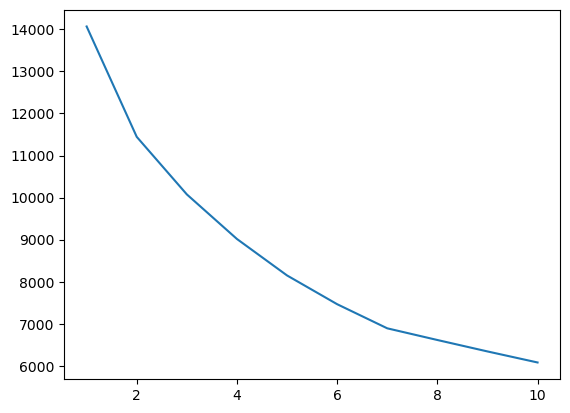

In [23]:
plt.plot(range(1,11),wcss)

In [46]:
t=KMeans(init='k-means++',n_clusters=4)
y_label=t.fit_predict(X_train_ss_pca)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


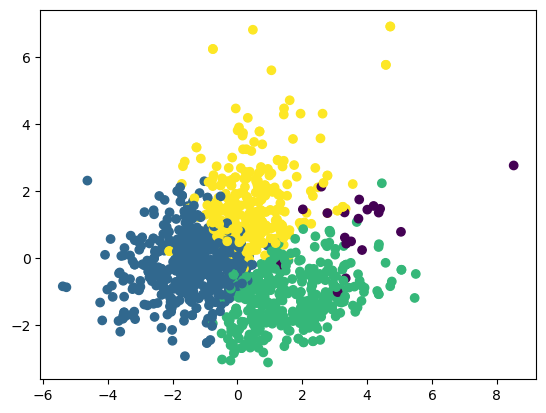

In [47]:
import matplotlib.pyplot as plt
plt.scatter(X_train_ss_pca[:,0],X_train_ss_pca[:,1],c=y_label)

In [48]:
from sklearn.metrics import silhouette_score
sil_coeff=[]
for k in range(2,11):
    km=KMeans(n_clusters=k,init='k-means++')
    km.fit(X_train_ss_pca)
    score=silhouette_score(X_train_ss_pca,km.labels_)
    sil_coeff.append(score)
    

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [45]:
sil_coeff

[0.21704727831188075,
 0.19308908796345067,
 0.21182821477190553,
 0.18611980072716153,
 0.1876982549968519,
 0.18618519610784862,
 0.18848666779993853,
 0.18236560250608233,
 0.15426130413740596]

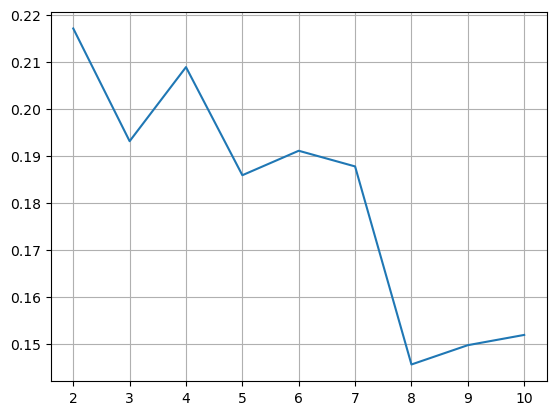

In [41]:
plt.plot(range(2,11),sil_coeff)
plt.grid(True)